# Introduction

In this project, you will build a neural network of your own design to evaluate the CIFAR-10 dataset.
Our target accuracy is 70%, but any accuracy over 50% is a great start.
Some of the benchmark results on CIFAR-10 include:

78.9% Accuracy | [Deep Belief Networks; Krizhevsky, 2010](https://www.cs.toronto.edu/~kriz/conv-cifar10-aug2010.pdf)

90.6% Accuracy | [Maxout Networks; Goodfellow et al., 2013](https://arxiv.org/pdf/1302.4389.pdf)

96.0% Accuracy | [Wide Residual Networks; Zagoruyko et al., 2016](https://arxiv.org/pdf/1605.07146.pdf)

99.0% Accuracy | [GPipe; Huang et al., 2018](https://arxiv.org/pdf/1811.06965.pdf)

98.5% Accuracy | [Rethinking Recurrent Neural Networks and other Improvements for ImageClassification; Nguyen et al., 2020](https://arxiv.org/pdf/2007.15161.pdf)

Research with this dataset is ongoing. Notably, many of these networks are quite large and quite expensive to train. 

## Imports

In [139]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list first.
The transforms module is already loaded as `transforms`.

CIFAR-10 is fortunately included in the torchvision module.
Then, you can create your dataset using the `CIFAR10` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/docs/stable/torchvision/datasets.html#cifar)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [175]:
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.25, 0.25, 0.25))])
batch_size = 50

# Create training set and define training dataloader
## YOUR CODE HERE ##
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# Create test set and define test dataloader
## YOUR CODE HERE ##
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# The 10 classes in the dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [176]:
def showImages(img_loader, count):
    dataiter = iter(img_loader)
    batch = next(dataiter)
    labels = batch[1][0:count]
    images = batch[0][0:count]
    imageGrid = torchvision.utils.make_grid(images)
    imageGridNumPy = imageGrid.numpy()
    plt.imshow(imageGridNumPy.T)
    plt.imshow(np.transpose(imageGridNumPy, (1, 2, 0))) # rorate and change column to row
    plt.show()
    print(' '.join(f'{classes[labels[j]]:5s}' for j in range(count)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


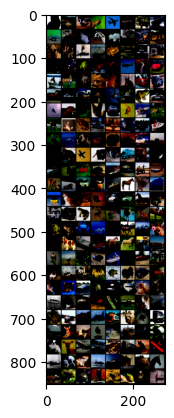

cat   ship  horse frog  plane car   deer  ship  plane plane cat   horse dog   truck deer  horse dog   dog   ship  ship  frog  deer  ship  truck bird  car   frog  frog  frog  plane bird  car   ship  horse dog   dog   frog  cat   car   truck ship  ship  car   bird  bird  ship  frog  car   plane horse deer  cat   car   bird  ship  deer  horse cat   frog  car   horse bird  ship  ship  deer  plane dog   bird  frog  horse car   truck bird  cat   plane bird  bird  truck cat   bird  car   horse deer  bird  ship  truck plane plane deer  deer  truck bird  ship  horse dog   bird  ship  cat   cat   dog   car   car   horse frog  car   truck frog  deer  bird  deer  frog  horse frog  frog  car   ship  bird  horse car   dog   deer  dog   ship  ship  horse horse car   ship  bird  bird  frog  bird  ship  bird  car   horse deer  ship  truck frog  frog  dog   car   deer  cat   dog   car   frog  truck ship  dog   cat   ship  cat   horse horse plane deer  cat   plane frog  truck truck plane truck deer  frog

In [145]:
# Explore data
## YOUR CODE HERE ##
showImages(trainloader, batch_size)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset. 
Feel free to construct a model of any architecture – feedforward, convolutional, or even something more advanced!

In [177]:
## YOUR CODE HERE ##
class CifarNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
network = CifarNetwork()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [178]:
## YOUR CODE HERE ##
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(network.parameters(), lr=0.001, momentum=0.99)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss during each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [179]:
## YOUR CODE HERE ##
for epoch in range(50):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        miniBatchCount = 250
        if i % miniBatchCount == miniBatchCount - 1:    # print every 250 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / miniBatchCount:.3f}')
            running_loss = 0.0
print('Done')

[1,   250] loss: 2.263
[1,   500] loss: 1.930
[1,   750] loss: 1.674
[1,  1000] loss: 1.547
[2,   250] loss: 1.481
[2,   500] loss: 1.412
[2,   750] loss: 1.396
[2,  1000] loss: 1.349
[3,   250] loss: 1.342
[3,   500] loss: 1.283
[3,   750] loss: 1.258
[3,  1000] loss: 1.278
[4,   250] loss: 1.180
[4,   500] loss: 1.185
[4,   750] loss: 1.158
[4,  1000] loss: 1.180
[5,   250] loss: 1.089
[5,   500] loss: 1.094
[5,   750] loss: 1.107
[5,  1000] loss: 1.126
[6,   250] loss: 1.022
[6,   500] loss: 1.060
[6,   750] loss: 1.077
[6,  1000] loss: 1.069
[7,   250] loss: 0.986
[7,   500] loss: 0.984
[7,   750] loss: 1.036
[7,  1000] loss: 1.020
[8,   250] loss: 0.937
[8,   500] loss: 0.954
[8,   750] loss: 0.966
[8,  1000] loss: 0.987
[9,   250] loss: 0.914
[9,   500] loss: 0.907
[9,   750] loss: 0.935
[9,  1000] loss: 0.934
[10,   250] loss: 0.871
[10,   500] loss: 0.875
[10,   750] loss: 0.907
[10,  1000] loss: 0.932
[11,   250] loss: 0.826
[11,   500] loss: 0.851
[11,   750] loss: 0.883
[11,

Plot the training loss (and validation loss/accuracy, if recorded).

In [95]:
## YOUR CODE HERE ##

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 70%, great work! 
This is a hard task to exceed 70% on.

If your accuracy is under 45%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [180]:
## YOUR CODE HERE ##
# setup
dataiter = iter(testloader)
images, labels = next(dataiter)
actualData = [classes[labels[j]] for j in range(batch_size)]

# predict
outputs = network(images)
_, predicted = torch.max(outputs, 1)
predictResult = [classes[predicted[j]] for j in range(batch_size)]
compare = [[x, y, 1 if x == y else 0] for x, y in zip(predictResult, actualData)]
correct = sum(x[2] == 1 for x in compare)
accuracy = round(correct / batch_size * 100, 2)
print(f"Correct: {correct}/{batch_size} ({accuracy}%)")

Correct: 33/50 (66.0%)


## Saving your model
Using `torch.save`, save your model for future loading.

In [181]:
## YOUR CODE HERE ##
PATH = './cifa10_network.pth'
torch.save(net.state_dict(), PATH)

## Make a Recommendation

Based on your evaluation, what is your recommendation on whether to build or buy? Explain your reasoning below.



**Double click this cell to modify it**

From the experience of slowliness on my laptop, I would run this kind of model on a machine having a GPU.
Also I would build an optimize program, something like in the 1st project, we can test the model with different parameters and find the best model. Due to the weakness of my laptop I cannot do it now.

